# Spam Ham  Classification

The Spam Ham email dataset consists of data of emails :

Number of Attributes/Columns in data: 3

Attribute Information:

subject:subject of the email

message- This contains a complete information of the email.

Label - this has a value 0 and 1(spam/Ham) which will be considered as dependent variable 

# Objective:
Given a review, determine whether the review is positive or negative

# Importing all the required Libraries

In [64]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle

import os

# Importing Train Dataset

In [112]:
data=pd.read_csv('messages.csv')

In [66]:
data.head(5)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [113]:
data.shape

(2893, 3)

# Exploring the Features of the dataset

In [67]:
data['subject']

0                 job posting - apple-iss research center
1                                                     NaN
2       query : letter frequencies for text identifica...
3                                                    risk
4                                request book information
                              ...                        
2888                         love your profile - ysuolvpv
2889                   you have been asked to join kiddin
2890                   anglicization of composers ' names
2891    re : 6 . 797 , comparative method : n - ary co...
2892                 re : american - english in australia
Name: subject, Length: 2893, dtype: object

In [68]:
data['message']

0       content - length : 3386 apple-iss research cen...
1       lang classification grimes , joseph e . and ba...
2       i am posting this inquiry for sergei atamas ( ...
3       a colleague and i are researching the differin...
4       earlier this morning i was on the phone with a...
                              ...                        
2888    hello thanks for stopping by ! ! we have taken...
2889    the list owner of : " kiddin " has invited you...
2890    judging from the return post , i must have sou...
2891    gotcha ! there are two separate fallacies in t...
2892    hello ! i ' m working on a thesis concerning a...
Name: message, Length: 2893, dtype: object

# Null/Missing Value Analysis

In [69]:
data.isnull().sum()

subject    62
message     0
label       0
dtype: int64

from the above data we can see the subject of the email has 62 null/Missing values which will be  treated in the next section 

In [70]:
data['subject'].fillna(data['subject'].mode().values[0],inplace=True)

we have applied mode technique as above  to fill the na values of the subject feature

In [71]:
data.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [ ]:
We have succesfully treated the null value of the dataset.

# FEATURE ENGEERING

In order to get the complete information of the email in one column we have tried to concatenate the  subject and message of the email.

In [72]:
data['Subject-Message']=data['subject']+ data['message']

In [73]:
data['Subject-Message']

0       job posting - apple-iss research centercontent...
1       sociolinguisticslang classification grimes , j...
2       query : letter frequencies for text identifica...
3       riska colleague and i are researching the diff...
4       request book informationearlier this morning i...
                              ...                        
2888    love your profile - ysuolvpvhello thanks for s...
2889    you have been asked to join kiddinthe list own...
2890    anglicization of composers ' namesjudging from...
2891    re : 6 . 797 , comparative method : n - ary co...
2892    re : american - english in australiahello ! i ...
Name: Subject-Message, Length: 2893, dtype: object

In [74]:
data

,subject,message,label,Subject-Message
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...
...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,love your profile - ysuolvpvhello thanks for s...
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,you have been asked to join kiddinthe list own...
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,anglicization of composers ' namesjudging from...
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,"re : 6 . 797 , comparative method : n - ary co..."


# Familiarisation with the Subject-Message 

In [75]:
data['Subject-Message'].describe()

count                                                  2893
unique                                                 2876
top       re := 20 the virtual girlfriend and virtual bo...
freq                                                      4
Name: Subject-Message, dtype: object

In [76]:

data['Subject-Message'].groupby(data['label']).describe()

,count,unique,top,freq
label,,,,
0,2412,2408,ld ' 98 - call for participationld ' 98 the fi...,2
1,481,468,re := 20 the virtual girlfriend and virtual bo...,4


# Adding Length feature

In [77]:
data['length'] = data['Subject-Message'].apply(len)
data.head()

,subject,message,label,Subject-Message,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


# Dropping non usefull features

In [78]:
data.drop('subject',axis=1,inplace=True)

In [79]:
data.head(5)

,message,label,Subject-Message,length
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


# Data Visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE3D8AE908>,
      dtype=object)

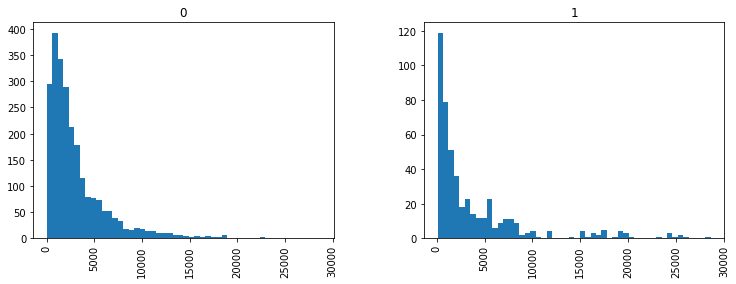

In [80]:
data.hist(column='length', by='label', bins=50,figsize=(12,4))

From the aboce chart , it can be concluded that the length of the text belong to class 0 is mostly between 0 to 5000 whereas in the case 
of class 1 the length range is from  0 to 3000

# Plotting count plot for target feature

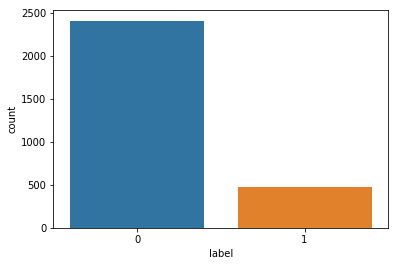

In [81]:
sns.countplot(x="label", data=data)

# Preprocessing Emails(Subject-Message)
In the Preprocessing phase we do the following in the order below:-

a) Begin by removing the html tags

b) Remove any punctuations or limited set of special characters like , or . or # etc.

c) Check if the word is made up of english letters and is not alpha-numeric

d) Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)

e) Convert the word to lowercase

f) Remove Stopwords

In [82]:
# printing some Messages
messg = data['Subject-Message'].values[0]
print(messg)
print('='*50)

job posting - apple-iss research centercontent - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical lan

In [83]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(messg, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

job posting - apple-iss research centercontent - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical lan

In [84]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [85]:
messg_0 = decontracted(messg)
print(messg_0)
print("="*50)

job posting - apple-iss research centercontent - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical lan

In [86]:
#remove words with numbers 
messg_0 = re.sub("\S*\d\S*", "", messg_0).strip()
print(messg_0)

job posting - apple-iss research centercontent - length :  apple-iss research center a us $  million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language 

In [87]:
#remove spacial character
messg_0 = re.sub('[^A-Za-z0-9]+', ' ', messg_0)
print(messg_0)

job posting apple iss research centercontent length apple iss research center a us million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowledge of acoustic phonet

In [88]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [89]:
# Combining all 
from tqdm import tqdm
preprocessed_message = []
# tqdm is for printing the status bar
for sentance in tqdm(data['Subject-Message'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_message.append(sentance.strip())

100%|█████████████████████████████████████████████████████████████████████████████| 2893/2893 [00:03<00:00, 829.48it/s]


In [90]:
#Printing a sample message after the preprocessing and cleaning of the text.
preprocessed_message[500]

'references romaniani interested getting list recent not recent work romanian particular phonetics phonology morphology please respond directly post summary list richard sproat linguistics research department bell laboratories tel mountain avenue room fax murray hill nj usa rws research att com'

In [91]:
#Printing a sample email after the preprocessing and cleaning of the text.
preprocessed_message[1000]

'comparative method syntactic reconstructionthe ongoing discussion list comparative method raised questions applicability syntactic reconstruction impression increasing frequency one comes across statements following literature attested languages language family x syntactic property therefore assume proto x property languages family language particular syntactic property therefore assume property innovation not present proto words tacit assumption comparative method applied syntax could anything resembling latin syntax reconstructed comparison syntax modern romance languages modern germanic languages svo therefore reconstruct proto germanic almost surely incorrectly svo standard introductions historical linguistics e g anttila jeffers lehiste etc argue comparative method inapplicable syntactic reconstruction due fact no analog syntax regular sound change oversimplifying bit words composed phonemes comparative method assumes phonemic change one word particular environment mirrored like 

# Lemmatizing the preprocessed_message

In [92]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
final_preprocessed_message=[]
for i in preprocessed_message:
    lemma_message=lemma.lemmatize(i,pos='v')
    final_preprocessed_message.append(lemma_message)
final_preprocessed_message[500]

'references romaniani interested getting list recent not recent work romanian particular phonetics phonology morphology please respond directly post summary list richard sproat linguistics research department bell laboratories tel mountain avenue room fax murray hill nj usa rws research att com'

Building a model using variuos classification models by featurizing the final_preprocessed_message in TFIDF . This activity would inculde hyper parameter tuning , computation of AUC ,  confusion matrix  , classification report and at last best model will be selected 

In [93]:
# Here for our activity final_preprocessed_message will be taken as our X and label will taken as Y 
#Imported train_test_split for spliiting the data set
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#######################################################################################################
Y = data['label'].values  # taken  label of the final data set after preprocessing
X = np.array(final_preprocessed_message)# converted into numpy array as shape cannot be obtained on list

  

# Train Test Split

In [94]:
#SPLITTING THE DATA SET INTO TRAIN ,TEST DATA
#Note:-Here in order to prevent the data leakage I have splitted the data in train , test repectively before transforming into Bow
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33 ,random_state =42) # this is random splitting
#Checking the shape of each data set
print("Checking the shape of each data set")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("-"*50)

Checking the shape of each data set
(1938,) (1938,)
(955,) (955,)
--------------------------------------------------


# Featurization in TFIDF

In [95]:
#Vectorizing using tfidf
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect.fit(X_train)
X_train_tfidf = tf_idf_vect.transform(X_train)
X_test_tfidf = tf_idf_vect.transform(X_test)
##########################################################################################################
#Checking the shape after Vectorization using tfidf
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)# converted the text into numerical vector in the form of tfidf for the TRAIN data
print(X_test_tfidf.shape, y_test.shape)# converted the text into numerical vector in the form of tfidf for the TEST data
print("="*100)

After vectorizations
(1938, 380841) (1938,)
(955, 380841) (955,)


# Importing all the required libraries for modelling

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Defining function to print the accuracy of the Model

In [97]:
def accuracy_of_model(model,X_train_tfidf,y_train,X_test_tfidf,y_test):
    model.fit(X_train_tfidf,y_train)
    pred = model.predict(X_test_tfidf)
    print('The accuracy  is {}'.format(accuracy_score(y_test,pred)))
    #return accuracy_score(test_y,pred)
    

# Defining function to plot the train , test AUC and print the confusion matrix.

In [98]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model):
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(y_train,model.predict_proba(X_train_tfidf)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(y_test,model.predict_proba(X_test_tfidf)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(X_test_tfidf)
    sns.heatmap(confusion_matrix(y_test,pred),annot=True)
    print(confusion_matrix(y_test,pred))

# Performing various classification models
Note :- The performance of the models will compared at the end with the help of Pretty table

# 1.DecisionTreeClassifier

In [34]:
#max_depth = np.arange(30)
parameter={'max_depth':[1, 5, 10, 50, 100, 500, 1000],'min_samples_split':[5, 10,50, 100, 500,1000]}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,parameter,cv=5)
gs.fit(X_train_tfidf,y_train)
gs.best_params_

{'max_depth': 1000, 'min_samples_split': 10}

In [39]:
DT=DecisionTreeClassifier(max_depth=1000,min_samples_split=10)
accuracy=accuracy_of_model(DT,X_train_tfidf,y_train,X_test_tfidf,y_test)


The accuracy  is 0.9455497382198953


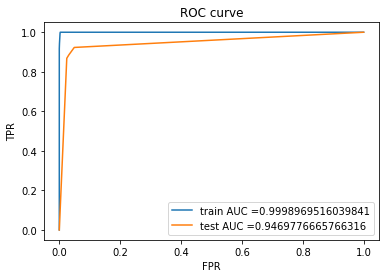

[[735  38]
 [ 14 168]]


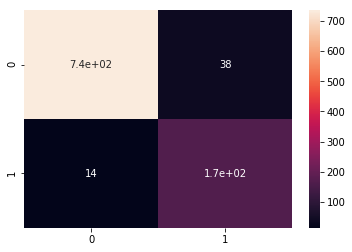

In [40]:
roc_curve(DT)

In [42]:
from sklearn.model_selection import cross_val_score
print('mean cross_val_score_AUC_SCORE_for_train',cross_val_score(DT,X_train_tfidf,y_train,scoring='roc_auc', cv=5).mean())
print('mean cross_val_score_AUC_SCORE_for_test',cross_val_score(DT,X_test_tfidf,y_test,scoring='roc_auc', cv=5).mean())

mean cross_val_score_AUC_SCORE_for_train 0.9031075079254913
mean cross_val_score_AUC_SCORE_for_test 0.8896505911022039


# 2.Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB
parameter={'alpha': [0.000001,0.00001,0.0001,0.001,0.01,1,10,100,1000,10000,100000]}
NB=MultinomialNB()
gs=GridSearchCV(NB,parameter,cv=5)
gs.fit(X_train_tfidf,y_train)
gs.best_params_

{'alpha': 1e-06}

In [44]:
NB=MultinomialNB(alpha=0.000001)
accuracy=accuracy_of_model(NB,X_train_tfidf,y_train,X_test_tfidf,y_test)

The accuracy  is 0.9895287958115183


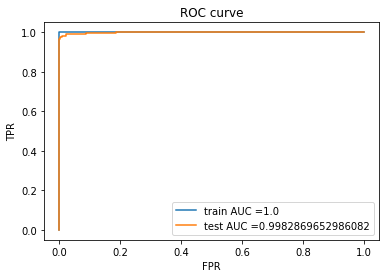

[[773   0]
 [ 10 172]]


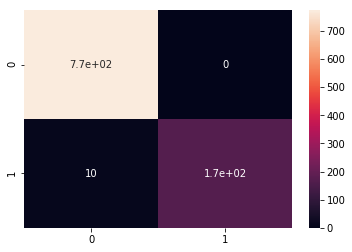

In [45]:
roc_curve(NB)

In [46]:
print('mean cross_val_score_AUC_SCORE_for_train',cross_val_score(NB,X_train_tfidf,y_train,scoring='roc_auc', cv=5).mean())
print('mean cross_val_score_AUC_SCORE_for_test',cross_val_score(NB,X_test_tfidf,y_test,scoring='roc_auc', cv=5).mean())

mean cross_val_score_AUC_SCORE_for_train 0.9998270182243107
mean cross_val_score_AUC_SCORE_for_test 0.9978171174945369


# 3.Logistic Regression

In [47]:
param={'C':[10**-4, 10**-2, 10**0, 10**2, 10**4],'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,param,cv=5)
gs.fit(X_train_tfidf,y_train)
gs.best_params_

{'C': 10000, 'penalty': 'l2'}

In [48]:
log=LogisticRegression(C=10000,penalty='l2')
accuracy=accuracy_of_model(log,X_train_tfidf,y_train,X_test_tfidf,y_test)

The accuracy  is 0.9916230366492147


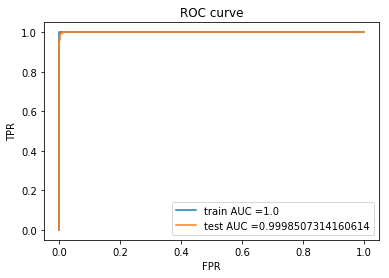

[[773   0]
 [  8 174]]


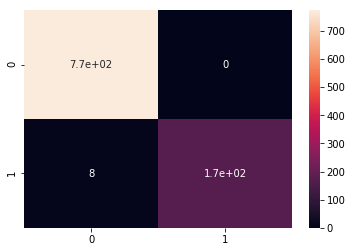

In [49]:
roc_curve(log)

In [50]:
print('mean cross_val_score_AUC_SCORE_for_train',cross_val_score(log,X_train_tfidf,y_train,scoring='roc_auc', cv=5).mean())
print('mean cross_val_score_AUC_SCORE_for_test',cross_val_score(log,X_test_tfidf,y_test,scoring='roc_auc', cv=5).mean())

mean cross_val_score_AUC_SCORE_for_train 0.9997652266776905
mean cross_val_score_AUC_SCORE_for_test 0.9996467728725793


# 4.RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[10,50,100,500,1000],'max_depth':[1, 5, 10, 50, 100, 500, 1000]}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=5)
gs.fit(X_train_tfidf,y_train)
gs.best_params_ 

{'max_depth': 1000, 'n_estimators': 500}

In [52]:
RF=RandomForestClassifier(n_estimators=500,max_depth=1000)
accuracy=accuracy_of_model(RF,X_train_tfidf,y_train,X_test_tfidf,y_test)

The accuracy  is 0.9570680628272251


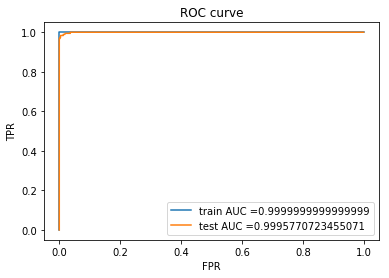

[[773   0]
 [ 41 141]]


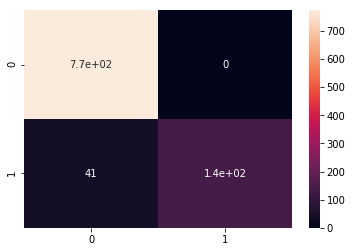

In [53]:
roc_curve(RF)

In [54]:
print('mean cross_val_score_AUC_SCORE_for_train',cross_val_score(RF,X_train_tfidf,y_train,scoring='roc_auc', cv=5).mean())
print('mean cross_val_score_AUC_SCORE_for_test',cross_val_score(RF,X_test_tfidf,y_test,scoring='roc_auc', cv=5).mean())

mean cross_val_score_AUC_SCORE_for_train 0.9977599383111697
mean cross_val_score_AUC_SCORE_for_test 0.9993279035214521


In [115]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","Accuracy", "CV-Train AUC", 'CV-Test AUC']
x.add_row(["TFIDF","Decision Tree",0.94,0.90,0.88])
x.add_row(["TFIDF","Naive Bayes",0.98,0.999,0.997])
x.add_row(["TFIDF","Logistic Regression",0.99,0.9997,0.9996])
x.add_row(["TFIDF","RandomForest",0.95,997,0.999])

print(x)

+------------+---------------------+----------+--------------+-------------+
| Vectorizer |        Model        | Accuracy | CV-Train AUC | CV-Test AUC |
+------------+---------------------+----------+--------------+-------------+
|   TFIDF    |    Decision Tree    |   0.94   |     0.9      |     0.88    |
|   TFIDF    |     Naive Bayes     |   0.98   |    0.999     |    0.997    |
|   TFIDF    | Logistic Regression |   0.99   |    0.9997    |    0.9996   |
|   TFIDF    |     RandomForest    |   0.95   |     997      |    0.999    |
+------------+---------------------+----------+--------------+-------------+


From the above prettytable we have selected Naive bayes as the best model because of the best AUC score 

# BEST MODEL-Naive Bayes

Now in the next phase of our model , we will be predicting the label (positive/negative) of the email using best model on the test data and at last we will be printing some words that are contributing to positive response and negative label respectively

Accuracy 0.9895287958115183


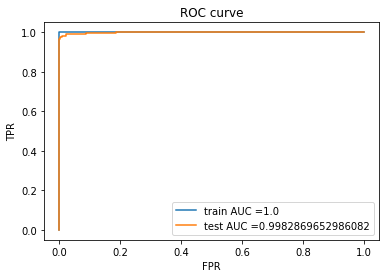

[[773   0]
 [ 10 172]]


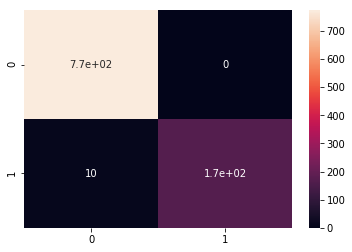

In [105]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB(alpha=0.000001)
NB.fit(X_train_tfidf,y_train)
pred = NB.predict(X_test_tfidf)
print('Accuracy',accuracy_score(y_test,pred))
roc_curve(NB)

In [103]:
print('mean cross_val_score_AUC_SCORE_for_train',cross_val_score(NB,X_train_tfidf,y_train,scoring='roc_auc', cv=5).mean())
print('mean cross_val_score_AUC_SCORE_for_test',cross_val_score(NB,X_test_tfidf,y_test,scoring='roc_auc', cv=5).mean())

mean cross_val_score_AUC_SCORE_for_train 0.9998270182243107
mean cross_val_score_AUC_SCORE_for_test 0.9978171174945369


In [107]:
print('classification Report \n',classification_report(y_test,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       773
           1       1.00      0.95      0.97       182

    accuracy                           0.99       955
   macro avg       0.99      0.97      0.98       955
weighted avg       0.99      0.99      0.99       955



# Top 50 important features of positive class

In [108]:
#print(top_50_positive)
weight=NB.coef_[0, :].argsort()
weight_sorted=weight[ : : -1]
positive_Features=np.take(tf_idf_vect.get_feature_names(), weight_sorted[:50])

In [109]:
positive_Features

array(['free', 'money', 'email', 'not', 'com', 'report', 'order',
       'addresses', 'get', 'no', 'mail', 'business', 'internet', 'http',
       'time', 'credit', 'click', 'remove', 'list', 'people', 'program',
       'new', 'make', 'site', 'check', 'want', 'please', 'name', 'call',
       'million', 'receive', 'one', 'sex', 'send', 'us', 'cd', 'address',
       'information', 'bulk', 'web', 'best', 'income', 'mailing',
       'software', 'email addresses', 'offer', 'capitalfm', 'see',
       'removed', 'live'], dtype='<U117')

# Top 50 important features of negative class

In [110]:
#print(top_50_negative)
weight=NB.coef_[0, :].argsort()
weight_sorted=weight[ : : 1]
negative_Features=np.take(tf_idf_vect.get_feature_names(), weight_sorted[:50])
negative_Features

array(['zzlsa gallua', 'university md', 'university mechanical',
       'news would', 'university melbourne', 'news unless', 'news united',
       'university members', 'newsgroup comp', 'university memphis',
       'news textual', 'university michael', 'news syllabus',
       'news subscribers', 'news sponsoring', 'news section',
       'university michigan', 'university methods', 'university might',
       'newsgroup listserv', 'newsgroup sci', 'university maryland',
       'newsletter details', 'university masato',
       'newsletter contrastive', 'newsletter contragram',
       'newsletter computer', 'university massachusets',
       'university mckeesport', 'newslet htm', 'newshi news', 'newshi',
       'university massachusetss', 'university massachusetts',
       'university massachussetts', 'university masters',
       'university matters', 'newslet', 'news reports', 'news reporting',
       'news report', 'university mnewman', 'news galiza',
       'news galician', 'university